In [1]:
from geopy import distance
from pathlib import Path
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request

In [2]:
def load_data():
    file_path = Path("data/housing.csv")
    if not file_path.is_file():
        Path("data").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/RainelDias88/regression/blob/main/data/housing.csv"
        urllib.request.urlretrieve(url, file_path)
    return pd.read_csv(Path("data/housing.csv"))

In [3]:
df = load_data()

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

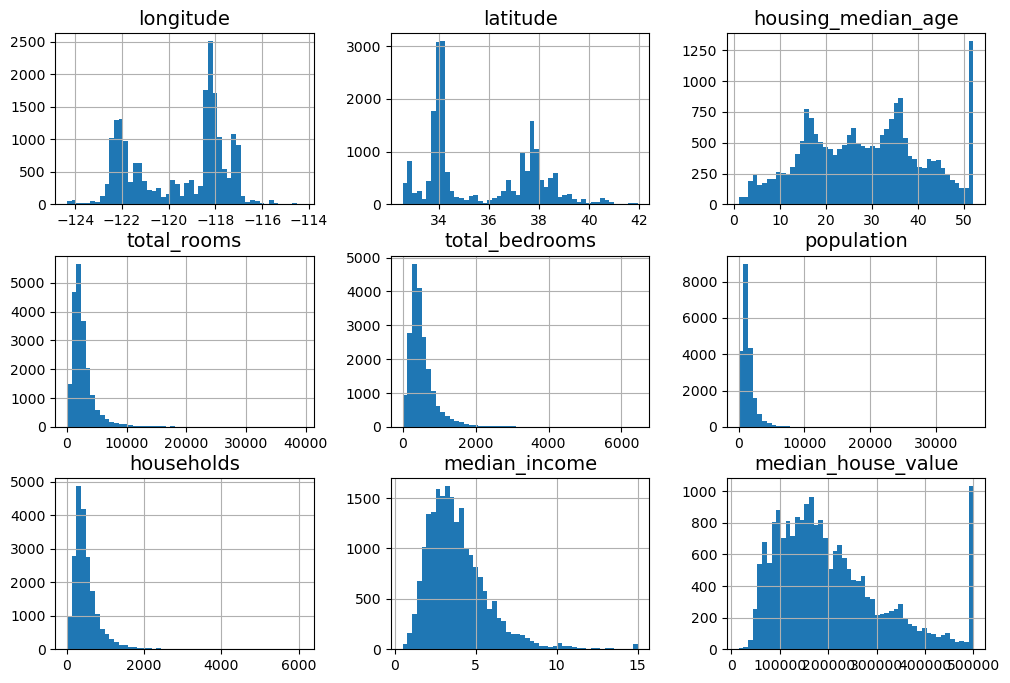

In [9]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [10]:
train_set, set_test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])                        

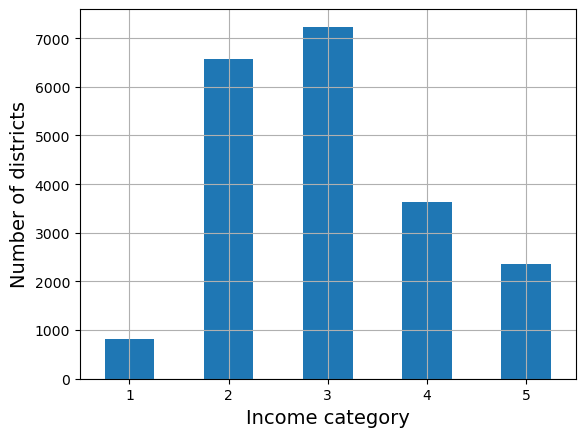

In [13]:
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
def income_cat_proportions(data):
    return (data["income_cat"].value_counts() / len(data)) * 100

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(df),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set)    
}).sort_index()
compare_props.index.name = "Income category"
compare_props["Strat. Error %"] = ((compare_props["Stratified %"] / compare_props["Overall %"] - 1) * 100)
compare_props["Rand. Error %"] = ((compare_props["Random %"] / compare_props["Overall %"] - 1) * 100)

compare_props = compare_props.round(2)

In [17]:
compare_props

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [19]:
df = strat_train_set.copy()

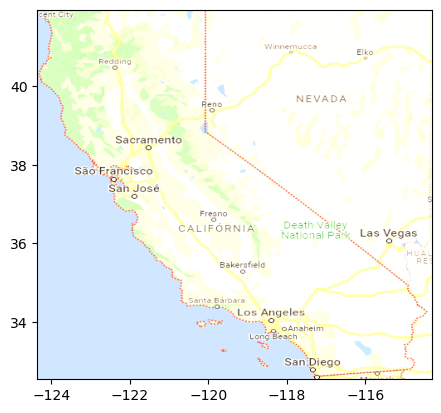

In [20]:
def load_image():
    file_path = Path("images/California.png")
    if not file_path.is_file():
        Path("images").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/RainelDias88/regression/blob/main/images/California.png"
        urllib.request.urlretrieve(url, file_path)
    return Path("images/California.png")

image = load_image()
california_image = plt.imread(image)
axis = df["longitude"].min(), df["longitude"].max(), df["latitude"].min(), df["latitude"].max()
plt.imshow(california_image, extent=axis)
plt.show()

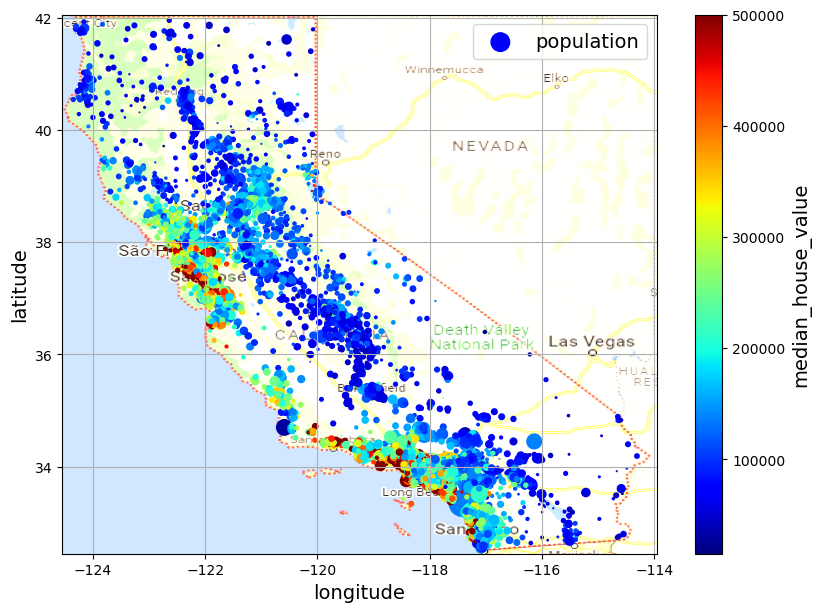

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=df["population"] / 100, label="population",
       c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
california_image = plt.imread(image)
axis = df["longitude"].min() - 0.20, df["longitude"].max() + 0.35, df["latitude"].min() - 0.09, df["latitude"].max() + 0.10
plt.imshow(california_image, extent=axis)

plt.show()

In [22]:
corr_matrix = df.select_dtypes(include="number").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [23]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [24]:
corr_matrix = df.select_dtypes(include="number").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

In [25]:
# (lat, lon)
los_angeles = (34.3, 118.14)
san_francisco =  (37.46, 122.24)
san_diego = (32.42, 117.09)
san_jose = (37.20, 121.54)
sacramento = (38.34, 121.29)
orange_county = (33.40, 117.46)
san_bernardino_county = (34.49, 116.11)
fresno = (36.44, 119.46)

In [26]:
df["los_angeles_proximity"] = [distance.distance((lat, long), los_angeles).km for lat, long in zip(df["latitude"], df["longitude"])]
                                                 
df["san_francisco_proximity"] = [distance.distance((lat, long), san_francisco).km for lat, long in zip(df["latitude"], df["longitude"])]                                                 
                                                 
df["san_diego_proximity"] = [distance.distance((lat, long), san_diego).km for lat, long in zip(df["latitude"], df["longitude"])]

df["san_jose_proximity"] = [distance.distance((lat, long), san_jose).km for lat, long in zip(df["latitude"], df["longitude"])]

df["sacramento_proximity"] = [distance.distance((lat, long), sacramento).km for lat, long in zip(df["latitude"], df["longitude"])]

df["orange_county_proximity"] = [distance.distance((lat, long), orange_county).km for lat, long in zip(df["latitude"], df["longitude"])] 

df["san_bernardino_county_proximity"] = [distance.distance((lat, long), san_bernardino_county).km for lat, long in zip(df["latitude"], df["longitude"])] 

df["fresno_proximity"] = [distance.distance((lat, long), fresno).km for lat, long in zip(df["latitude"], df["longitude"])] 

In [27]:
corr_matrix = df.select_dtypes(include="number").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value                 1.000000
median_income                      0.687151
rooms_per_house                    0.146255
total_rooms                        0.135140
housing_median_age                 0.114146
households                         0.064590
san_bernardino_county_proximity    0.064203
sacramento_proximity               0.063539
fresno_proximity                   0.063069
san_jose_proximity                 0.061967
los_angeles_proximity              0.061934
san_francisco_proximity            0.061618
orange_county_proximity            0.061609
san_diego_proximity                0.060889
total_bedrooms                     0.047781
people_per_house                  -0.021991
population                        -0.026882
longitude                         -0.047466
latitude                          -0.142673
bedrooms_ratio                    -0.259952
Name: median_house_value, dtype: float64

In [28]:
features = df.drop("median_house_value", axis=1)
labels = df["median_house_value"].copy()

In [29]:
features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house', 'los_angeles_proximity', 'san_francisco_proximity',
       'san_diego_proximity', 'san_jose_proximity', 'sacramento_proximity',
       'orange_county_proximity', 'san_bernardino_county_proximity',
       'fresno_proximity'],
      dtype='object')

In [30]:
labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [41]:
#features.loc[features.isnull().any(axis=1)]
(features.isnull().sum() / len(features) * 100).round(2)

longitude                          0.00
latitude                           0.00
housing_median_age                 0.00
total_rooms                        0.00
total_bedrooms                     0.96
population                         0.00
households                         0.00
median_income                      0.00
ocean_proximity                    0.00
rooms_per_house                    0.00
bedrooms_ratio                     0.96
people_per_house                   0.00
los_angeles_proximity              0.00
san_francisco_proximity            0.00
san_diego_proximity                0.00
san_jose_proximity                 0.00
sacramento_proximity               0.00
orange_county_proximity            0.00
san_bernardino_county_proximity    0.00
fresno_proximity                   0.00
dtype: float64

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

# num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())